# FLDAS Explorer Dashboard
Modified: Jun 17, 2019

In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, time
import datetime as dt
import numpy as np
import scipy as sp
import pandas as pd
import geopandas as gpd
import intake,param
    
from pathlib import Path
from pprint import pprint as pp
p = print 

from sklearn.externals import joblib
import pdb

from tqdm import tqdm, trange
import ipywidgets as iw

import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')
    
# Don't generate bytecode
sys.dont_write_bytecode = True

/Users/hayley/miniconda3/envs/earthml/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
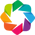

In [26]:
import holoviews as hv
import xarray as xr
import xarray.ufuncs as xu

from holoviews import opts
from holoviews.util import Dynamic
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize

from holoviews.streams import Stream, param
from holoviews import streams
import geoviews as gv
import geoviews.feature as gf
from geoviews import tile_sources as gvts

import panel as pn

import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cf


hv.notebook_extension('bokeh')
hv.Dimension.type_formatters[np.datetime64] = '%Y-%m-%d'
pn.extension()

# set pandas dataframe float precision 
pd.set_option('display.precision',2)


In [3]:
# Add the utils directory to the search path
UTILS_DIR = Path('../utils').absolute()
assert UTILS_DIR.exists()
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))
    print(f"Added {str(UTILS_DIR)} to sys.path")    

Added /Users/hayley/Playground/InteractML/examples/tutorial/../utils to sys.path


In [4]:
import utils as u
import hv_utils as  hvu

In [5]:
# Grab registered bokeh renderer
print("Currently available renderers: ", *hv.Store.renderers.keys())
renderer = hv.renderer('bokeh')

Currently available renderers:  bokeh


## Set default holoviews style options

In [6]:
%opts Image [colorbar=True, tools=['hover'], active_tools=['wheel_zoom']] Curve [tools=['hover']]

In [7]:
opts.defaults(
    opts.WMTS(active_tools=['wheel_zoom']),
    opts.Image(active_tools=['wheel_zoom'], tools=['hover'], colorbar=True),
    opts.Curve(active_tools=['wheel_zoom'], tools=['hover']),
    opts.Scatter(active_tools=['wheel_zoom'], tools=['hover']),
    opts.HLine(active_tools=['wheel_zoom'], tools=['hover']),

    opts.RGB(active_tools=['wheel_zoom']),
    opts.Overlay(active_tools=['wheel_zoom']),
)


In [8]:
H,W = 500,500

---
## Load Datasets

In [9]:
# Southern Africa Dataset
data_dir = Path.home()/'data'
fpath_sa = str(
    data_dir/'mint/FLDAS/FLDAS_NOAH01_A_SA_D.001/2019/04/FLDAS_NOAH01_A_SA_D.A201904*.001.nc'
)
fpath_ea = str(
    data_dir/'mint/FLDAS/FLDAS_NOAH01_A_EA_D.001/2019/04/FLDAS_NOAH01_A_EA_D.A201904*.001.nc'
)
ds_sa = xr.open_mfdataset(fpath_sa)
ds_sa = ds_sa.drop_dims('bnds')

ds_ea = xr.open_mfdataset(fpath_ea)
ds_ea = ds_ea.drop_dims('bnds')

         
# print(ds_ea)
# print(ds_sa)

In [10]:
xrd_ea = ds_ea.persist()
xrd_sa = ds_sa.persist()

In [11]:
# data variable list
varnames_ea = list(ds_ea.data_vars.keys())
varnames_sa = list(ds_sa.data_vars.keys())
varnames = varnames_ea
varname = varnames[3]
print(varname)

# create holoviews dataset containers 
kdims = ['X','Y','time']
hvd_ea = hv.Dataset(xrd_ea, kdims)
hvd_sa = hv.Dataset(xrd_sa, kdims)


Psurf_f_tavg


In [12]:
# colormaps
## discretize it conveniently using holoview's "color_level" option
t_fixed = '2019-04-05'
varname = varnames[5] 
print("Selecting a datavariable at a fixed time point: ", t_fixed, varname)

# timg_ea = hvd_ea.select(time=t_fixed).to(gv.Image, kdims=['X', 'Y'], vdims=varname) #this returns a holomap, not a hv.Image object
# To construct an hv.Image object, we need to pass in the xr.DataArray (ie. one value variable)
print(xrd_ea[varname].isel(time=3) )
timg_ea = gv.Image(xrd_ea[varname].isel(time=3) , ['X','Y'], crs=ccrs.PlateCarree()) #Opt: vdims=varname
timg_sa = gv.Image(xrd_sa[varname].isel(time=3) , ['X','Y'], crs=ccrs.PlateCarree()) #Opt: vdims=varname
# print(timg_sa)
# gv.tile_sources.Wikipedia * timg_ea.opts(alpha=0.5,width=W_IMG, height=H_IMG) #+ timg_sa.opts(width=W_IMG, height=H_IMG)

Selecting a datavariable at a fixed time point:  2019-04-05 Qg_tavg
<xarray.DataArray 'Qg_tavg' (Y: 348, X: 294)>
dask.array<shape=(348, 294), dtype=float32, chunksize=(348, 294)>
Coordinates:
  * X        (X) float64 22.05 22.15 22.25 22.35 ... 51.05 51.15 51.25 51.35
  * Y        (Y) float64 -11.75 -11.65 -11.55 -11.45 ... 22.65 22.75 22.85 22.95
    time     datetime64[ns] 2019-04-04
Attributes:
    standard_name:  downward_heat_flux_in_soil
    long_name:      soil heat flux
    units:          W m-2
    vmin:           -1000000000000000.0
    vmax:           1000000000000000.0
    cell_methods:   time:mean


## Basemap tile

We need to handle the projection from latlon to web mercator (which is what the hv.tiles expect).


In [13]:
wmts_url = 'https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'
basemap = gv.tile_sources.EsriImagery

---
## Add Callbacks 

### LatLon Tab selector stream

Fetch the lat,lon location from the mouse location

In [14]:
from holoviews.streams import *#Tap, Selection1D, PointerXY, RangeXY

In [15]:
# Defne time sereis scatter point selector stream
# tscatter_selection = Selection1D(source=tseries.Scatter.I)

In [16]:
def cb_rangexy(x_range, y_range):
    lbrt = hvu.ranges2lbrt(x_range, y_range)
    print(f'x_range: {x_range}')
    print(f'y_range: {y_range}')
    print(f'lbrt: ', lbrt)
    
    df = pd.DataFrame( [lbrt], columns='min_x min_y max_x max_y'.split() )
    return hv.Table( df)


---
## Add zonal statistics
Modified: Jun 20, 2019


In [25]:
box_stream = BoundsXY(bounds=(0,0,0,0),
                      source = timg_ea)


### Add a debugger div to show the current value of the stream 
Automatically the output of the stream is updated as hv.Div element

In [27]:
def get_debug_div(*args, **kwargs):
    content = f'<p> args: {str(args)} </p>'
    content += """
    <p> kwargs:  </p>
    <ul>
    """
    for k,v in kwargs.items():
        content += f'<li>{k}: {v}</li>'
    content += '</ul>'
    return hv.Div(content)

# Dynamically create the debug div with the stream of interest
dmap_debug = hv.DynamicMap(get_debug_div, streams=[box_stream])

In [28]:
# timg_ea.opts(width=300, height=300, colorbar=False) + dmap_debug

1. Try with hv.BoundsXY stream

Limitation: handles a single bounding box

In [29]:
lbtr = box_stream.bounds
print(lbtr)

(0, 0, 0, 0)


In [30]:
def pretty_df_describe(df_describe, stat_types=None):
    """
    Return a new df with stats of kind in 'sel'
    - df_describe: an output dataframe of df.describe() for some dataframe `df`
    """
    if stat_types is None:
        stat_types= ['min', 'max', 'mean', 'std', '25%', '50%', '75%']
    return u.select(df_describe.T, stat_types, axis=1).T

In [33]:
def bounds_to_div(bounds):
    xmin, ymin, xmax, ymax = map(np.around, bounds)
    return hv.Div(f"""
    <h3>ROI</h3>
    <p>Lat: {(ymin, ymax)}, Lon: {(xmin, xmax)}</p>
    """)

def bounds_to_box(bounds):
    pass

# Generic functions (without being tied to holoviews functions/elements)
def get_roi_data(xrd, varname, t, bounds):
    """
    Given a dataset, variable name, time index, and (regional) bounds in lat,lon degree,
    compute the distribution of the values within this region
    Args:
    - xrd (xarray.Dataset)
    - varname (str): a data variable
    - t (int or dt.Datetime object)
    - bounds (tuple of floats): in order of lbtr, ie. (xmin, ymin, xmax, ymax)
    - nodata_val (any object): will be used to replace the NaN values 
    
   Returns 
    
    """
    minx, miny, maxx, maxy = bounds
    if isinstance(t, int):
        data = xrd[varname].isel(time=t).sel(X=slice(minx, maxx), Y=slice(miny,maxy))
    else:# isinstance(t):#, np.datetime64):
        data = xrd[varname].sel(time=t, X=slice(minx, maxx), Y=slice(miny,maxy))
#     else:
#         raise ValueError(
#             f"Selected time input should be either int or np.datetime: {type(t)}"
#         )
    return data

def get_roi_stats(xrd, varname, t, bounds):#, nodata_val=0):
    """
    Returns a pd.DataFrame which is an output of a selected roi data's dataframe's describe method
    """
    
    data = get_roi_data(xrd, varname, t, bounds)
    
    # handle nan?
    stats = data.to_dataframe().describe()
    stats = pretty_df_describe(stats)

    return stats

def get_hv_roi_stats(xrd, varname, t, bounds, decimals=None):#nodata_val=0,):
    """
    Returns a holoview's Div element 
    that shows the selected bounds
    """
    data = get_roi_data(xrd, varname, t, bounds)
    df_stats = pretty_df_describe(data.to_dataframe().describe())
    
    if not decimals:
        decimals = 2
    str_bounds = ','.join(map(lambda b: str(np.around(b)), bounds))
    div_stats = hv.Div(np.around(df_stats, decimals=decimals).to_html(), 
                  label=str_bounds)
    return div_stats

# def dyn_hv_roi_hist(xrd, varname, t, bounds):
#     data = get_roi_data(xrd, varname, t, bounds)

#     # Min and Max computed across all time data for this variable
#     gmin = np.nanmin(xrd[varname])
#     gmax = np.nanmax(xrd[varname])
    
#     return hv.operation.histogram(hv.Dataset(data, ['X','Y'], varname),
#                                   bin_range=(gmin,gmax))


In [34]:

minx,miny,maxx, maxy = box_stream.bounds
roi_stats = get_roi_stats(xrd_ea, varname, 10, lbtr)
display(roi_stats)

Qg_tavg
min       NaN
max       NaN
mean      NaN
std       NaN
25%       NaN
50%       NaN
75%       NaN

In [35]:
hv_stats = get_hv_roi_stats(xrd_ea, varname, 10, lbtr)
hv_stats

:Div

In [37]:
timg_ea #<< dyn_hv_roi_hist(xrd_ea, varname,10,lbtr) 

:Image   [X,Y]   (Qg_tavg)

In [ ]:
dmap_bounds = hv.DynamicMap(bounds_to_div, streams=[box_stream])
# dmap_roi_stats = hv.DynamicMap(
#     lambda bounds: hv.Div(get_roi_stats(xrd_ea, varname, 10, bounds).to_html()),
#     streams=[box_stream])
dmap_roi_stats = hv.DynamicMap(
    lambda bounds: get_hv_roi_stats(xrd_ea, varname, 10, bounds),
    streams=[box_stream])
dmap_roi_data = hv.DynamicMap(
    lambda bounds: hv.Dataset(get_roi_data(xrd_ea, varname, 10, bounds), ['X','Y'], varname),
    streams = [box_stream])

gmin = np.nanmin(xrd_ea[varname])
gmax = np.nanmax(xrd_ea[varname])
dmap_roi_hist = hv.operation.histogram(dmap_roi_data, 
                                       bin_range=(gmin,gmax))

(
    timg_ea + dmap_debug +
    (dmap_bounds + dmap_roi_hist) + dmap_roi_stats 
    
).cols(2)

In [40]:
get_hv_roi_stats(xrd_ea, varnames[7],10,  box_stream.bounds)

:Div

Success!

2. Extend the selection capability to multiple boxes using `hv.BoxEdit` linked stream

In [434]:
polys = gv.Polygons([], crs=ccrs.PlateCarree()) # this will become a scriber of the BoxEdit
# sream defined below, so it will be modified as we create roi regions
boxes_stream = BoxEdit(source=polys)

In [438]:
# ds = xrd_ea[varname]
xrd=xrd_ea
varname=varnames[7]
time='2019-04-05'
def roi_curves(data):
    if not data or not any(len(d) for d in data.values()):
        return hv.NdOverlay({0: hv.Curve([], 'time', varname)})
    curves = {}
    data = zip(data['x0'], data['y0'], data['x1'], data['y1'])
    for i, (xmin, ymin, xmax, ymax) in enumerate(data):
#         pdb.set_trace()

        selection = xrd[varname].sel(X=slice(xmin,xmax), Y=slice(ymin,ymax))
        selection = hv.Dataset(selection, ['X','Y', 'time'], varname)
        
        curves[i] = hv.Curve(selection.aggregate('time', np.mean))
    
#     hline = hv.HLine(time, 'time')
    return hv.NdOverlay(curves)# * hline


In [439]:
# Let's see what the stream outputs
dmap_debug = hv.DynamicMap(get_debug_div, streams=[boxes_stream])
dmap_roi_curves = hv.DynamicMap(roi_curves, streams=[boxes_stream])

In [ ]:
%%opts Curve {+framewise} [width=500]
# (
#     timg_ea * polys + dmap_debug 
#     + dmap_roi_curves
# ).cols(2)

---
## Putting the streams together


## FLDASExplorer with panel
Modified: Jun 13, 2019

In [ ]:
# Set extra style opts (in addition to default from above)
W_IMG = 500; H_IMG = 500
W_PLOT = 300; H_PLOT = 300

In [ ]:
scatter_opts = dict(width=W_PLOT, height=H_PLOT,
                    tools=['hover', 'tap'], 
                    framewise = True)
curve_opts = dict(width=W_PLOT, height=H_PLOT,
                  framewise=True)
img_opts = dict(width=W_IMG, height=H_IMG,
                axiswise=True, 
                framewise=False,
                tools=['hover', 'tap'],
                colorbar=True
               )
wmts_opts = dict(width=W_IMG, height=H_IMG)

tbl_opts = dict(width = W_PLOT)

# datashader opts
ds_opts = dict(width=W_IMG, height=H_IMG,
#             x_sampling=0.5, 
#             y_sampling=0.5,
            )

In [342]:
import datetime as dt


trange = list(map(pd.Timestamp, hvd_ea.range('time')))
basemap.opts(**wmts_opts)

class FLDASExplorer(param.Parameterized):

    ################################################################################
    ## Parameters
    ################################################################################
    region = param.ObjectSelector(default='EA', objects=['EA', 'SA'])
    varname = param.ObjectSelector(default=varnames[10],objects=varnames)
    time = param.Date(trange[0], bounds=trange)
    time_slider= param.Date(trange[0], bounds=trange)

    alpha = param.Number(default=1.0, bounds=(0.0,1.0))
#     cmap = param.ObjectSelector(default='fire', objects=['fire'])


    ################################################################################
    ## Initialize instance
    ################################################################################
    def __init__(self):
        super().__init__()
        self._init_streams()
        self._init_debug_box()
        self._update_vmin_vmax()
        self._set_dyn_main()
        self._set_dyn_funcs()
        
    @param.depends('region', 'varname', watch=True)
    def _update_vmin_vmax(self):
        # Min and Max computed across all time data for this variable
        xrd = xrd_ea if self.region == 'EA' else xrd_sa
        self.gmin = np.nanmin(xrd[varname])
        self.gmax = np.nanmax(xrd[varname])
        

    ################################################################################
    ## Initialize Link streams inbetween static components
    ################################################################################
    @param.depends('region', 'varname', 'time', watch=True)
    def _set_dyn_main(self):
        print("Setting main plot dynamically...")
        print('\tTime: ', self.time, type(self.time))
        dmap_img = hv.DynamicMap(self.get_main_img)
        dyn_img = datashade(Dynamic(dmap_img),**ds_opts)

        self.dyn_main = basemap * dyn_img
    
        # must relink the streams 
        self.dyn_img = dyn_img
        self.tap_stream.source = self.dyn_img
        self.box_stream.source = self.dyn_img

    
    # This is where the main components are declared
    def _set_dyn_funcs(self):
        self.dyn_tseries = hv.DynamicMap(self.cb_tseries, streams=[self.tap_stream] )
        self.dyn_tstats = hv.DynamicMap(self.cb_tstats, streams=[self.tap_stream])
        self.dyn_second_plot = basemap* datashade(hv.DynamicMap(self.cb_second_plot, streams=[self.sel_stream]),
                              **ds_opts)
        self.dmap_bounds = hv.DynamicMap(bounds_to_div, streams=[self.box_stream])
        self.dmap_roi_stats =  hv.DynamicMap(self.cb_roi_stats, streams=[self.box_stream])
        self.dmap_roi_hist = hv.operation.histogram(
            hv.DynamicMap(self.cb_roi_data, streams=[self.box_stream]),
            bin_range=(self.gmin,self.gmax))
        
    def _init_streams(self):
        self.tap_stream = Tap(name='tap_latlon', x=35.0, y=0.0)#, source=self.main_plot)
        self.sel_stream = Selection1D()
        self.box_stream = BoundsXY( name='box', bounds=(0.,0.,0.,0.))
        self.dummy = Tap(name='dummy', x=0, y=0)
        self.streams = [self.tap_stream, self.sel_stream, self.box_stream]
        print(f"Created initial stream instances...{len(self.streams)}")

    def _init_debug_box(self):
        print("Initialing a debug box...")
        self.debug_box = hv.Div("""
        <h1 style='color:blue;border:1px solid blue'>Debug Box</h1>
        """)
        self.debug_dmap = hv.DynamicMap(self.get_updated_debug_box, 
                                       streams=self.streams)
        print('Initiated debug_dmap with current streams to debug_box')
        
    def get_updated_debug_box(self, *args, **kwargs):
        hvu.append_to_div(self.debug_box, str(args))
        hvu.append_to_div(self.debug_box, str(kwargs))
        return self.debug_box
    
    
    ################################################################################
    ## Dynamic Building Blocks (hv.DynamicMaps)
    ################################################################################        
    @param.depends('region', 'varname', 'time')#, watch=True)
    def get_main_img(self):
        print("Getting a new main img...")
        print(f'\tTime: {self.time}, Region: {self.region}')
        xrd = xrd_ea if self.region == 'EA' else xrd_sa
        img = hvu.get_img(xrd, self.varname, self.time)
        # debug
        
        return img.relabel(self.varname).opts(**img_opts)

        
    ################################################################################
    ## Link streams Callbacks
    ################################################################################
    @param.depends('region', 'varname')
    def cb_tseries(self, x, y, method='nearest'):
        """
        Affects:
        - Until the first time this callback  called by the instance, there is no
        self.tscatter attribute 
        - Everytime it is called, self.tscatter is updated to the new scatter plot 
        object that resides in the caller hv.DynamicMap.plot instance
            - The reason to maintain which self.tscatter we use is to 
        """
        print(f'cb_tseries is called. x,y: {x,y, self.region,self.varname}"')
        xrd = xrd_ea if self.region == 'EA' else xrd_sa  
        tseries = xrd[self.varname].sel(X=x, Y=y, method=method)
        tseries_label = f"Time Series for {self.varname} at Lon,Lat = ({x:.2f},{y:.2f}) "

        # Time series as Scatter and Curve
        print('\tself.scatter is updated')
        self.tscatter = hv.Scatter(tseries, label=self.varname)
        curve = hv.Curve(tseries)

        # Important! Connect the self.sel_stream to this new tscatter
        print("\tself.sel_stream's source is changed to the new self.tscatter object")
        self.sel_stream.source = self.tscatter

        # Add HLine at mean over time
        mean = hvu.extract_item(tseries.mean())
        mean_line = hv.HLine(mean, label='tseries_mean')
        t_midpoint = pd.Timestamp(hvu.extract_item(tseries.coords['time'][len(tseries)//2]))
        mean_label = hv.Labels([(t_midpoint, mean, f'mean: {mean:.3f}')])

        # Put together to an Overlay
        overlay = (
            curve.opts(alpha=0.5, line_width=2, **curve_opts) 
            * self.tscatter.opts(padding=0.2, size=10, **scatter_opts) 
            * mean_line.opts(color='black', alpha=0.5, line_width=1)
            * mean_label.opts(text_font_size='8pt',text_alpha=0.5)
        ) 
        overlay = overlay.relabel(tseries_label)
#         self.overlay = overlay

        return overlay #vs. self.overlay
    
    @param.depends('region', 'varname')
    def cb_tstats(self, x, y, 
                  method='nearest',show_as_timestamp=True, decimals=3):
        print(f"cb_tstats is called: {x, y, self.region, self.varname}")
        xrd = xrd_ea if self.region == 'EA' else xrd_sa  
        tseries = xrd[self.varname].sel(X=x, Y=y, method=method)
        df = hvu.get_stats(tseries, 
                           show_as_timestamp=show_as_timestamp, decimals=decimals)

        # Add metadata on selected latlon point
    #     df['point_idx'] = index[0]#
        df['lat'] = y
        df['lon'] = x

        cols = df.columns.to_list()
        cols = cols[-2:] + cols[:-2]
        df = df[cols]
        label = f"Time Series Stats for {self.varname} at Lon,Lat = ({x:.2f},{y:.2f}) "
        print("\tUpdated self.tstats_table")
        self.tstats_table = hv.Table(df, label=label).opts(**tbl_opts)
        return self.tstats_table
    
    @param.depends('region', 'varname')
    def cb_second_plot(self, index):
        print('Callback from the scatter plot is called. Selected indices: ', index)
        if not index:
            index = [0] #todo: current tindex
        tidx = index[0]
        
        xrd = xrd_ea if self.region == 'EA' else xrd_sa 
        img = hvu.get_img(xrd, self.varname, tidx)
        label = f"{self.varname} on {self.time.strftime('%Y/%m/%d')}"
        return img
#         dmap_second = hv.DynamicMap(img)
#         dyn_second = datashade(Dynamic(dmap_second), **dopts)
# #         pdb.set_trace()
#         return  basemap * dyn_second

    @param.depends('region', 'varname', 'time')
    def cb_roi_data(self, bounds):
        minx, miny, maxx, maxy = bounds
        xrd = xrd_ea if self.region == 'EA' else xrd_sa 
#         if isinstance(t, int):
#             data = xrd[varname].isel(time=self.time).sel(X=slice(minx, maxx), Y=slice(miny,maxy))
#         else:
#             data = xrd[varname].sel(time=self.time, X=slice(minx, maxx), Y=slice(miny,maxy))
        data = xrd[varname].sel(time=self.time, X=slice(minx, maxx), Y=slice(miny,maxy))

        return hv.Dataset(data, ['X','Y'],self.varname)

        
    @param.depends('region', 'varname', 'time')
    def cb_roi_stats(self, bounds):
        xrd = xrd_ea if self.region == 'EA' else xrd_sa 
        return get_hv_roi_stats(xrd, self.varname, self.time, bounds)
    
    
    
    ################################################################################
    ## Build views
    ################################################################################
    def view(self):
        layout = (
            self.dyn_main
            + self.dyn_tstats
            + self.dyn_tseries
            + self.dyn_second_plot
        )

        return layout.opts(
                    opts.Image(**img_opts),
                    opts.Scatter(**scatter_opts),
                    opts.Curve(**curve_opts),
                    opts.Table(**tbl_opts) 
                ).cols(1)

In [343]:
explorer = FLDASExplorer()
widgets = pn.Param(explorer.param, widgets={
    'time_slider': pn.widgets.DateSlider,
    'time': pn.widgets.DatePicker
})

Created initial stream instances...3
Initialing a debug box...
Initiated debug_dmap with current streams to debug_box
Setting main plot dynamically...
	Time:  2019-04-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [347]:
(
    explorer.dyn_main.opts(height=300, width=300, 
                           active_tools=['wheel_zoom', 'box_select']) + 
    explorer.dmap_bounds+ explorer.dmap_roi_stats + 
    explorer.dmap_roi_hist
).cols(2)

:Layout
   .DynamicMap.RadT_tavg                                                                      :DynamicMap   []
      :Overlay
         .WMTS.I        :WMTS   [Longitude,Latitude]
         .RGB.RadT_tavg :RGB   [X,Y]   (R,G,B,A)
   .DynamicMap.I                                                                              :DynamicMap   []
      :Div
   .DynamicMap.A_27_full_stop_0_comma_7_full_stop_0_comma_35_full_stop_0_comma_15_full_stop_0 :DynamicMap   []
      :Div
   .DynamicMap.II                                                                             :DynamicMap   []
      :Histogram   [RadT_tavg]   (RadT_tavg_frequency)

In [ ]:
row1 = pn.Row( widgets, explorer.dyn_main, explorer.dyn_second_plot
#               pn.Column (explorer.dyn_tstats, explorer.dyn_tseries )
             )
row2 = pn.Row(pn.Spacer(width=300), explorer.dyn_tseries, explorer.dyn_tstats)
pn.Column(row1, row2)#.servable()


In [ ]:
# app = pn.Row( explorer.param, explorer.view)
# app = pn.Column( explorer.param, 
#                 pn.panel(explorer.build_main_plot),
#                 pn.panel( explorer.build_tseries_plot), 
#                 pn.panel( explorer.build_second_plot),
# #                 pn.panel( explorer.build_tstats_table),
#                )

In [ ]:
# app.servable()


---
## Arrange widgets 
Modified: Jun 19, 2019

In [ ]:
title = """#MINT Interactive Visualization for Spatiotemporal Data"""
instruction = """
This is a demo of an interactive visualization for a large set of spatiotemporal data. 
Here we use the FLDAS NOAH01 daily data in Southern Africa (SA) and Eastern Africa (EA) for the month of April in 2019.
This demo supports a **correct** visualization of a **large** dataset without falling into common visualization [mistakes](#) 
such as overplotting and deceptive colormapping via [Datashader]() and [Colorcet]().


## Instructions

1. Dataset selection

    - dropdown boxes: choose `region`, `variable`, `time`  of interest
    - To specify `time`, a user can either type a specific time to the `Time` input box
    or use the time slider to navigate through multiple time points

2. All maps are responsive to user inputs from the mouse or trackpad.

    - pan or zoom: navigate the map
    - mouse hover or click: get its value or see through multiple time points at a specific (Lat, Lon)
    - drag or box-select: compute zonal statistics in the selected area

3. The time-series plot also supports interactivity

    - pan, zoom, mouse-hover as above
    - click on a point: allows to see the data at the current timepoint over the entire region

## Suggestions?
We would like to know what kind of functionalities users are most interested in.  
Please drop a line for requests, and we'll start working on adding supports for popular requests!

## Questions?
Please feel free to contact haejinso@usc.edu for any questions.
"""

viz_title = """#FLDAS Explorer POC"""
tseries_title = """##Time Series Analysis"""




In [ ]:
W_HEADER = 300 + W_IMG*2
texts = pn.Column( pn.Pane(title, width=W_HEADER),
          pn.Pane(instruction, width=W_HEADER))
viz_title = pn.Pane(viz_title)
tseries_title = pn.Pane(tseries_title)


In [ ]:
# main panel components
header = pn.Column(texts,viz_title)
row1 = pn.Row( widgets, explorer.dyn_main, explorer.dyn_second_plot)
row2 = pn.Row( tseries_title)
row3 = pn.Row(pn.Spacer(width=300), explorer.dyn_tseries, explorer.dyn_tstats)
pn.Column(header,row1, row2, row3).servable()